#CSB352: Data Mining
**Instructor** : [Dr. Chandra Prakash]:
    
    For more information visit the class website (https://cprakash86.wordpress.com/csb352_s21/).
#LAB Assignment 5: Feature Enginnering using Video
- Assigning Date : 01-Feb-2021
- Due Date: 07-Feb-2021
- Student Name : **Rohit Byas Sherwan**
- Roll No. : **181210043**

#Assignment Instructions
You must save your as Assignment_NO_Yourname
Agenda for the Assignment 5
1. Feature Enginnering using video
  - Data ProcessinVisualization and pre-processing using video

Your source file will most likely end in .pynb if you are using a Jupyter notebook; however, it might also end in
.py if you are using a Python script.

You have to add your name and roll no in the Google Colab Instructions section below and print it.
#Google CoLab Instructions
The following code ensures that Google CoLab is running the correct version of TensorFlow.


In [1]:
try:
 from google.colab import drive
 %tensorflow_version 2.x
 COLAB = True
 print("Assignment 5")
 print("Note: using Google CoLab")
except:
 print("Assignment 5")
 print("Note: not using Google CoLab")
 COLAB = False

#print name and roll number:
print("Rohit byas sherwan")
print("181210043")

from datetime import datetime 
import pytz 
IST = pytz.timezone('Asia/Kolkata') 
#print("IST in Default Format : ", datetime.now(IST)) 
datetime_ist = datetime.now(IST) 
print("Date & Time in IST : ", datetime_ist.strftime('%Y:%m:%d %H:%M:%S %Z %z')) 

Assignment 5
Note: using Google CoLab
Rohit byas sherwan
181210043
Date & Time in IST :  2021:02:07 22:09:06 IST +0530


**Problem Statement : Development of 2D-Gait Analysis System**

This problem is in continuation to the **Assignment no 4.**

In this Assignment, you have to overcome the problem of occlusion as shown in figure (f); And extract the
trajectory as shown in figure (g) under methodlogy.

**PART 2: Feature Enginnering from Video :**
Development of 2D-Gait Analysis System :
- Extract the joint paramters/coordinates (x,y) from the video after applying pre-preocessing methods on it
as carried out in Previous Lab.
- In the pre-processing phase, identify the set of 5 red colored passive markers attached to the clothes of
the target subject at anatomical points of concern i.e. shoulder, hip, knee, ankle and toe.

**Expected output :**
1. Extract all Frames from the video.
2. Coordiantes (x,y) for all markers
    - M1: Shoulder;
    - M2: Hip;
    - M3: Knee;
    - M4: Ankle;
    - M5: Toe;
3. Fill the missing value
4. Coordinate Trajectory after Filling the data.
**Assignemnt 4: OUTPUT :**
- Identify all the red component markers
- Coordianted (x,y) for all markers as shown below:

**Assignemnt 5 Expected OUTPUT :**
1. Extract all Frames from the video.
2. Coordiantes (x,y) for all markers
    - M1: Shoulder;
    - M2: Hip;
    - M3: Knee;
    - M4: Ankle;
    - M5: Toe;
3. Fill the missing value
4. Coordinate Trajectory after Filling the data similar to shown in refernce PAPER Fig. 4. PART (g) or figure
part (g) under methodlogy section.


#Task 1: Downaload, Load and Read Video

In [19]:
import numpy as np
import pandas as pd
import cv2
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image, ImageOps
from sklearn.impute import SimpleImputer

vidObj = cv2.VideoCapture('/content/video/S3_Trim.mov')

#Task 2. Extract the Frames/images from the videos
    Extract all Frames from the video as shown in Figure Methodology part (b)
    Save it in folder.

In [20]:
count = 0
success = 1
while success: 
    success, image = vidObj.read() 
    if success==1:
      cv2.imwrite("/content/video/frame%d.jpg" % count, image)
    count += 1

#Task 3 . Extract the red components from each image.
- Create a function based on your LAB Assignment 4.
    - From the image, extract the red components in the image.
    - Label all the connected components in the image.
    - To draw line between points for all 5 red color markers

In [21]:
def findPoints(path):
    nemo = cv2.imread(path)
    #plt.imshow(nemo)
    #plt.show()
    nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
    #plt.imshow(nemo)
    hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
    #plt.imshow(hsv_nemo)
    #plt.show()
    light_orange = (1, 150, 160)
    dark_orange = (78, 255, 255)
    mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
    plt.imshow(mask)
    connectivity = 4  
    # Perform the operation
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    # Get the results

    num_labels = output[0]-1

    centroids = output[3][1:]
    return num_labels,centroids


#Task 4. LOOP to extract all 5 marker coordinates markers for all frames/images
Coordiantes (x,y) for all markers
- M1: Shoulder;
- M2: Hip;
- M3: Knee;
- M4: Ankle;
- M5: Toe;

[array([[1918.625     ,  661.        ],
       [1852.        ,  820.        ],
       [1892.875     ,  957.46428571],
       [1865.73722628,  987.84671533]]), array([[1913.9375    ,  508.9375    ],
       [1903.75      ,  662.18902439],
       [1831.94      ,  819.15      ],
       [1839.53846154,  972.46153846],
       [1803.73043478,  994.7826087 ]]), array([[1895.70212766,  512.23404255],
       [1883.88679245,  664.56603774],
       [1812.70833333,  824.49404762],
       [1786.80555556,  981.98611111],
       [1747.05128205,  992.1025641 ]]), array([[1905.57777778,  510.35555556],
       [1893.82857143,  662.78857143],
       [1822.02205882,  820.93382353],
       [1812.48333333,  977.76666667],
       [1773.7810219 ,  993.45985401]]), array([[1856.85416667,  517.54166667],
       [1840.77070064,  670.66242038],
       [1772.05759162,  830.94240838],
       [1723.60103627,  980.25388601],
       [1687.2173913 ,  990.05590062]]), array([[1835.38461538,  519.28205128],
       [1819.4

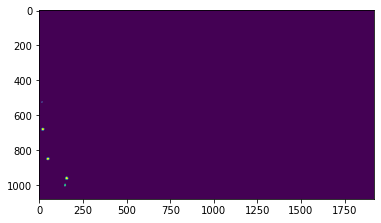

In [22]:
num_labels = []
centroids = []
#print(findPoints('/content/video/frame10.jpg'))
for i in range(114):
  a,b = findPoints('/content/video/frame%d.jpg' % i)
  if a==5 or a==4:
    num_labels.append(str(i)+"->"+str(a))
    centroids.append(b)
    #num_labels.append(str(i)+"->"+str(a))
    #centroids.append(str(i)+"->"+str(b))
#print(num_labels)
print(centroids)
#11,25

In [23]:
for x in range(len(centroids)):
  print(centroids[x][0][1])

661.0
508.9375
512.2340425531914
510.35555555555555
517.5416666666666
519.2820512820513
518.734693877551
517.3235294117648
517.84
516.6764705882352
514.5
511.25
508.5
508.8333333333333
508.5
664.5267175572519
513.9375
518.1875
518.1632653061224
518.5957446808511
516.0232558139535
514.6610169491526
512.7678571428571
506.02985074626866
507.241935483871
505.8181818181818
507.8611111111111
510.65432098765433
514.4
517.5632183908046
516.065934065934
518.635294117647
518.6039603960396
518.3953488372093
518.2043010752689
516.9397590361446
517.1686746987951
513.5783132530121
510.6969696969697
510.56410256410254
511.9846153846154
514.5797101449275
513.1333333333333
517.5072463768116
519.0666666666667
519.379746835443
517.4871794871794
515.890625
516.4328358208955
513.5285714285715
510.64
506.6393442622951
509.4024390243902
507.7142857142857
513.0540540540541
518.4032258064516
521.8888888888889
524.3243243243244
524.7619047619048
524.5454545454545
524.1875
676.8855421686746
676.5935483870968
670

In [24]:
data = []
for x in range(len(centroids)):
  lst = np.zeros(10)
  flag=0
  for i in range(len(centroids[x])):
    if centroids[x][i][1]>500 and centroids[x][i][1]<530:
      lst[0]=centroids[x][i][0]
      lst[1]=centroids[x][i][1]
    if centroids[x][i][1]>600 and centroids[x][i][1]<690:
      lst[2]=centroids[x][i][0]
      lst[3]=centroids[x][i][1]
    if centroids[x][i][1]>800 and centroids[x][i][1]<860:
      lst[4]=centroids[x][i][0]
      lst[5]=centroids[x][i][1]
    if centroids[x][i][1]>900 and flag==0:
      lst[6]=centroids[x][i][0]
      lst[7]=centroids[x][i][1]
      flag=1
    if centroids[x][i][1]>900 and flag==1:
      lst[8]=centroids[x][i][0]
      lst[9]=centroids[x][i][1]
  data.append(lst)

In [25]:
print(data)

[array([   0.        ,    0.        , 1918.625     ,  661.        ,
       1852.        ,  820.        , 1892.875     ,  957.46428571,
       1865.73722628,  987.84671533]), array([1913.9375    ,  508.9375    , 1903.75      ,  662.18902439,
       1831.94      ,  819.15      , 1839.53846154,  972.46153846,
       1803.73043478,  994.7826087 ]), array([1895.70212766,  512.23404255, 1883.88679245,  664.56603774,
       1812.70833333,  824.49404762, 1786.80555556,  981.98611111,
       1747.05128205,  992.1025641 ]), array([1905.57777778,  510.35555556, 1893.82857143,  662.78857143,
       1822.02205882,  820.93382353, 1812.48333333,  977.76666667,
       1773.7810219 ,  993.45985401]), array([1856.85416667,  517.54166667, 1840.77070064,  670.66242038,
       1772.05759162,  830.94240838, 1723.60103627,  980.25388601,
       1687.2173913 ,  990.05590062]), array([1835.38461538,  519.28205128, 1819.46103896,  671.96103896,
       1752.41968912,  831.76683938, 1718.71568627,  986.08333333,


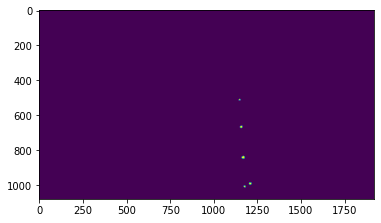

In [26]:
a,b = findPoints('/content/video/frame50.jpg')

In [27]:
df=pd.DataFrame(data)
#for i in range(len(data)):
 #   print(int(data[i][8]), end=" ")
  #  print(int(data[i][9]))
print(df)

              0           1            2  ...           7            8            9
0      0.000000    0.000000  1918.625000  ...  957.464286  1865.737226   987.846715
1   1913.937500  508.937500  1903.750000  ...  972.461538  1803.730435   994.782609
2   1895.702128  512.234043  1883.886792  ...  981.986111  1747.051282   992.102564
3   1905.577778  510.355556  1893.828571  ...  977.766667  1773.781022   993.459854
4   1856.854167  517.541667  1840.770701  ...  980.253886  1687.217391   990.055901
..          ...         ...          ...  ...         ...          ...          ...
91    70.166667  524.416667    83.485876  ...  986.248000   154.656863  1007.156863
92    52.210526  526.263158    63.941520  ...  982.413534   153.640777  1006.300971
93    34.892857  526.321429    42.932515  ...  974.392405   152.008696  1004.608696
94    43.363636  526.227273    53.419162  ...  978.820690   153.590476  1004.590476
95    16.578947  525.315789    21.508475  ...  960.615023   148.728261   999

#Task 5. Save the Data in CSV format by the name of "coordinate.csv"
    It Should be having 10 column (x1,y1, x2,y2, .... , x5,y5) and
    rows equal to no of frames/images in the video.
    M1 (x1,y1)
    M2 (x2,y2)
    : :
    M5 (X5,y5)

In [28]:
df.to_csv('/content/video/coordinates.csv')

#Task 6. Display Original Coordinate Trajectory .

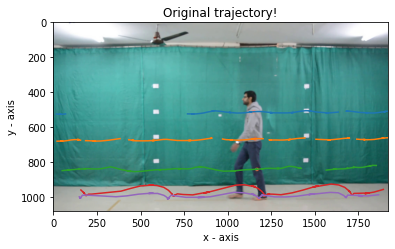

In [29]:
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.nan)

a = df[0]
b = df[1]
plt.plot(a,b)
c = df[2]
d = df[3]
plt.plot(c,d)
e = df[4]
f = df[5]
plt.plot(e,f)
g = df[6]
h = df[7]
plt.plot(g,h)
x = df[8]
y = df[9]
plt.plot(x, y)
plt.axis([0, 1920, 1080, 0])

im = plt.imread("/content/video/frame50.jpg")
implot = plt.imshow(im)
plt.xlabel('x - axis') 
plt.ylabel('y - axis')  
plt.title('Original trajectory!') 

# function to show the plot 
plt.show() 


#Task 7. Handle Missing Data
Hint : use
    
    Linear interpolation Techniques as discussed in the paper.
    or
    your own method

In [30]:
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.nan)
values = df.values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#print(imputer)
transformed_values = imputer.fit_transform(values)
#print(f'Missing: {np.isnan(transformed_values).sum()}' )
df2=pd.DataFrame(transformed_values)
print(df2)

              0           1            2  ...           7            8            9
0      0.000000  515.697885  1918.625000  ...  957.464286  1865.737226   987.846715
1   1913.937500  508.937500  1903.750000  ...  972.461538  1803.730435   994.782609
2   1895.702128  512.234043  1883.886792  ...  981.986111  1747.051282   992.102564
3   1905.577778  510.355556  1893.828571  ...  977.766667  1773.781022   993.459854
4   1856.854167  517.541667  1840.770701  ...  980.253886  1687.217391   990.055901
..          ...         ...          ...  ...         ...          ...          ...
91    70.166667  524.416667    83.485876  ...  986.248000   154.656863  1007.156863
92    52.210526  526.263158    63.941520  ...  982.413534   153.640777  1006.300971
93    34.892857  526.321429    42.932515  ...  974.392405   152.008696  1004.608696
94    43.363636  526.227273    53.419162  ...  978.820690   153.590476  1004.590476
95    16.578947  525.315789    21.508475  ...  960.615023   148.728261   999

#Task 8. Final Coordinate Trajectory after Filling the data as shown in figure (g) under methodlogy .
    Each Trajectory can be shown with a diffent color.

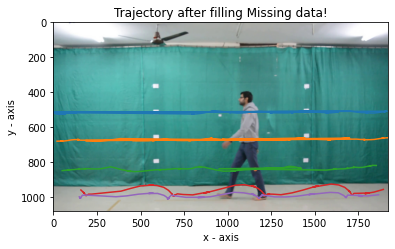

In [31]:
k = df2[0]
l = df2[1]
plt.plot(k,l)
m = df2[2]
n = df2[3]
plt.plot(m,n)
o = df2[4]
p = df2[5]
plt.plot(o,p)
q = df2[6]
r = df2[7]
plt.plot(q,r)
s = df2[8]
t = df2[9]
plt.plot(s,t)
plt.axis([0, 1920, 1080, 0])

im = plt.imread("/content/video/frame51.jpg")
implot = plt.imshow(im)

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('Trajectory after filling Missing data!') 

# function to show the plot 
plt.show() 


#Task 9: Kimematic Parameters Estimation : Knee Angle
In the final process, after marker detection and tracking procedure, feature extraction phase starts. In this,
joint regions of gait (marker co-ordinates) contain significant information that helps in the identification of gait
kinematics of an individuals is extracted.
Hint :
1. Considering the Canadian Society of Biomechanics (CSB) Gait Standards inn Refernce Fig. 6.

  or

2. The knee angle was calculated using vector dot product. From the hip, knee, and ankle coordinates
obtained from the coordiante data two vectors were constructed. The first vector begins at the hip and
ends at the knee while the second one begins at the knee and ends at the ankle. The knee angle ( )for
the frame in Fig. 3 is given by the following equation 1


In [32]:
data2 = df2.values.tolist()

In [33]:
import math
def knee(lst):
  a=[]
  b=[]
  a.append(lst[2]-lst[4])
  a.append(lst[3]-lst[5])
  b.append(lst[4]-lst[6])
  b.append(lst[5]-lst[7])
  th=(a[0]*b[0]+a[1]*b[1])/(math.sqrt(a[0]*a[0]+a[1]*a[1])*math.sqrt(b[0]*b[0]+b[1]*b[1]))
  theta = math.acos(th)
  return theta  

In [34]:
angle=[]
for i in range(len(data2)):
  angle.append(knee(data2[i]))
print(angle)

[0.6858228334395731, 0.4785969659004655, 0.2557319439399962, 0.36547412586005884, 0.09119630404302703, 0.1821862984889494, 0.25903624856375934, 0.30889728849680254, 0.28762501481197, 0.3127938555793985, 0.2810897408743808, 1.2552124715858735, 1.2157333538389516, 0.20373923465077473, 0.21734799955461925, 0.19402442968053935, 0.1914499333983532, 0.2874758950412216, 0.4575942183855698, 0.359701784643909, 0.7264841590708323, 2.7231119197950355, 2.7109498386696256, 0.5733473390286, 0.4581891284938611, 0.774352180961463, 0.5226056436657085, 0.23426927553773594, 0.03579015083121208, 0.03844309556304868, 0.004283879748211285, 0.16403870138924917, 0.26341482340617905, 0.3203163898690104, 0.340406753302191, 0.31635288960915503, 0.341672548103919, 0.7896158103431008, 0.2725087727668344, 0.2216282644090347, 0.19760313725481105, 0.1958123494426771, 0.19696873119990102, 0.2171168164577626, 0.29231553267295807, 0.4250490549722456, 0.6742057468174589, 0.9245186071024798, 0.8014856006568668, 1.08106123

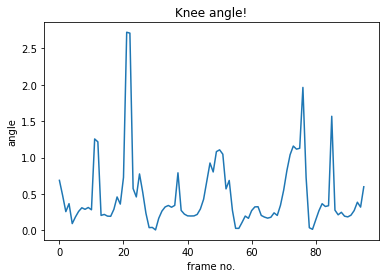

In [35]:
aa = range(0, len(angle))
bb = angle
plt.plot(aa,bb)
#plt.axis([0, 1920, 1080, 0])

plt.xlabel('frame no.') 
plt.ylabel('angle') 

# giving a title to my graph 
plt.title('Knee angle!') 

# function to show the plot 
plt.show() 
